In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
#Reading the dataset
df=pd.read_csv("Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
#Information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
#Species count check
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='count'>

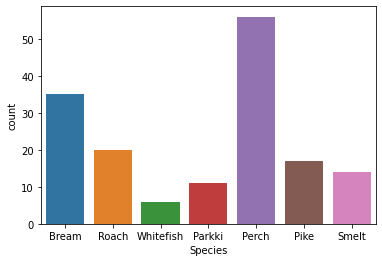

In [5]:
sns.countplot(data=df,x='Species')

<AxesSubplot:>

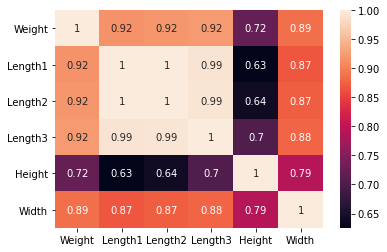

In [6]:
#Finding the correlation
sns.heatmap(df.corr(),annot=True)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

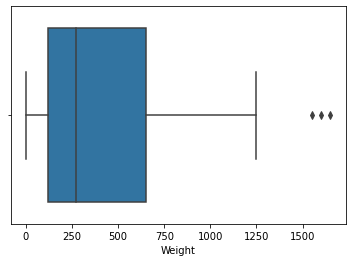

In [7]:
sns.boxplot(df['Weight'])

In [8]:
#Checking which rows have outliers with respective to weights
fish_weight = df['Weight']
Q3 = fish_weight.quantile(0.75)
Q1 = fish_weight.quantile(0.25)
IQR = Q3-Q1
lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 +(1.5*IQR)
weight_outliers = fish_weight[(fish_weight <lower_limit) | (fish_weight >upper_limit)]
weight_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

In [9]:
#Dropping the rows which have outliers
df1=df.drop([142,143,144])

In [10]:
final_df=df1.drop(['Species'],axis=1)
final_df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [11]:
#Weight prediction using the regression algorithm
from sklearn.model_selection import train_test_split
X=final_df.drop(['Weight'],axis=1)
y=final_df['Weight']
#Splitting the training and the test dataset
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)
linear_model=linear_model.LinearRegression()
linear_model.fit(x_train,y_train)
weight_pred=linear_model.predict(x_test)
print(weight_pred)

[ 173.51901044  548.79613448  715.4480646   610.20513001  890.62275874
  742.15933944  428.25342597  370.1190822   373.17730973  284.8989056
  754.02152084  245.6142675   669.69264488  768.0658556   755.33980652
   64.17233349  137.45659741  164.06309093  666.17279474  412.40243426
  485.48275346  836.7721298   126.04843087 -133.76860236  199.5532974
  -79.64131344 -130.61033848  618.00922133  689.98115669  145.13948961
  811.82926038  149.58587604 -118.14173214  810.02875747  510.73056319
  591.60966858   61.42043911  867.87492349  871.29903494 -124.95443844
 -179.20031811  844.58728395  329.82899084  791.23719861  -72.55134758
  360.24593342   76.58960385]


Text(0.5, 1.0, 'Test set vs predictions')

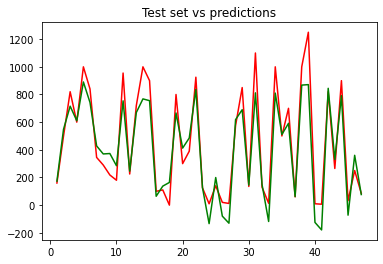

In [13]:
#plotting the test set and the prediction set
range_find = [i for i in range(1,48,1)]
plt.plot(range_find, y_test,color = 'red')
plt.plot(range_find, weight_pred,color = 'green')
plt.title('Test set vs predictions')